`3 BONUS`

Import all the necessary libraries

In [10]:
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Load the input data file into 'mydata'

In [11]:
with open('capacitor_dataset.pickle', 'rb') as thisdata:
    mydata = pickle.load(thisdata)

numberofelements=len(mydata) # there are 1000 datapoints containing pairs (x,y)
# x: time
# y: value of charge

Store the pair values of time and charge into two lists 'time-values' and 'charge_values' respectively

In [12]:
time_values = [pair[0] for pair in mydata]
charge_values = [pair[1] for pair in mydata]

Plot a graph showing the relationship between Time vs Charge

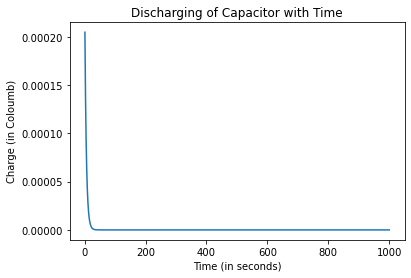

In [13]:

plt.plot(time_values, charge_values)
plt.xlabel('Time (in seconds)')
plt.ylabel('Charge (in Coloumb)')
plt.title('Discharging of Capacitor with Time')
plt.show()

Since, the function is exponential one, we cannot directly perform linear regression. Hence, we first take logarithm on both sides to convert the given equation in the form of y=mx+c

In [14]:
# Q=CVe^(-t/RC)
# Q/V=Ce^(-t/RC)
# ln(Q/V) = -t/RC + lnC
# y = mx+c
# y=ln(Q/5) => dependent variable
# x = t, m = -1/RC, c = lnC

dependent_variable = [math.log(charge/5) for charge in charge_values]
mypairs = zip(time_values,charge_values)
independent_variable = [time for time in time_values]

`Performing linear regression:`

This requires first converting the lists of 'dependent_variable' and 'independent_variable' into numpy arrays and then using reshape(-1,1) so that it has one column and as many rows as there are elements in the array. 
This is necessary because the 'fit()' method of 'LinearRegression' class expects a 2D array as input.

'model' is an instance of 'LinearRegression' class which fits a linear regression model to the data. The 'model' object contains the estimated coefficients and other information about the fitted model. 

In [15]:
x = np.array(independent_variable).reshape(-1, 1)
y = np.array(dependent_variable).reshape(-1,1)
model = LinearRegression().fit(x, y) 
# The fit() method estimates the coefficients of the linear regression model using the input data, using the least squares method. 

Extracting the values of 'slope' and 'intercept' from the fitted regression model.

'coef_ ' attribute of a trained 'LinearRegression' model returns a 2D array and gives the coefficients of the linear regression model.

'intercept_' attribute of a trained 'LinearRegression' model returns a 1D array and  gives the intercept of the linear regression model

In [16]:
slope = model.coef_[0][0]          # slope = -1/RC
intercept = model.intercept_[0]    # intercept = lnC

Calculating the values of Capacitance(in Farad) and Resistance(in ohms) by the slope and intercept calculated above

In [17]:
Capacitance = math.exp(intercept) 
# intercept = lnC
# => C = e^(intercept)
Resistance= -1 / (Capacitance*slope)
# slope = -1/RC
# => R = -1/(C*slope)

Displaying the values of Capacitance and Resistance

In [18]:
print("Capacitance =", Capacitance, "Farad")
print("Resistance =", Resistance, "ohms")

Capacitance = 4.9999999999997556e-05 Farad
Resistance = 100000.00000000493 ohms
